In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder
import warnings
warnings.filterwarnings('ignore')


In [3]:
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

print("="*60)
print("GROCERIES MARKET BASKET ANALYSIS PROJECT")
print("="*60)

GROCERIES MARKET BASKET ANALYSIS PROJECT


STEP 1: LOAD THE DATA

In [6]:
print("\n[1/6] Loading Dataset...")

# Load the groceries dataset
# The dataset typically has transactions with items separated by commas
df = pd.read_csv('C:\\Users\\anshi\\Downloads\\archive (11)\\Groceries_dataset.csv')

print(f"✓ Dataset loaded successfully!")
print(f"  Shape: {df.shape}")
print(f"  Columns: {list(df.columns)}")
print("\nFirst few rows:")
print(df.head())


[1/6] Loading Dataset...
✓ Dataset loaded successfully!
  Shape: (38765, 3)
  Columns: ['Member_number', 'Date', 'itemDescription']

First few rows:
   Member_number        Date   itemDescription
0           1808  21-07-2015    tropical fruit
1           2552  05-01-2015        whole milk
2           2300  19-09-2015         pip fruit
3           1187  12-12-2015  other vegetables
4           3037  01-02-2015        whole milk


 STEP 2: DATA EXPLORATION

In [7]:
print("\n[2/6] Exploring Data...")

print("\nDataset Info:")
print(df.info())

print("\nMissing Values:")
print(df.isnull().sum())

print("\nBasic Statistics:")
print(df.describe())

# Check unique values
if 'Member_number' in df.columns:
    print(f"\nTotal Unique Customers: {df['Member_number'].nunique()}")
if 'Date' in df.columns:
    print(f"Date Range: {df['Date'].min()} to {df['Date'].max()}")


[2/6] Exploring Data...

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    38765 non-null  int64 
 1   Date             38765 non-null  object
 2   itemDescription  38765 non-null  object
dtypes: int64(1), object(2)
memory usage: 908.7+ KB
None

Missing Values:
Member_number      0
Date               0
itemDescription    0
dtype: int64

Basic Statistics:
       Member_number
count   38765.000000
mean     3003.641868
std      1153.611031
min      1000.000000
25%      2002.000000
50%      3005.000000
75%      4007.000000
max      5000.000000

Total Unique Customers: 3898
Date Range: 01-01-2014 to 31-10-2015


STEP 3: DATA PREPROCESSING

In [8]:
print("\n[3/6] Preprocessing Data...")

# Group items by transaction/member
if 'Member_number' in df.columns and 'itemDescription' in df.columns:
    # Group by Member_number and Date if available
    if 'Date' in df.columns:
        transactions = df.groupby(['Member_number', 'Date'])['itemDescription'].apply(list).values
    else:
        transactions = df.groupby('Member_number')['itemDescription'].apply(list).values
else:
    # If structure is different, adjust accordingly
    print("Adjusting for dataset structure...")
    transactions = df.values.tolist()

print(f"✓ Total Transactions: {len(transactions)}")
print(f"  Sample transaction: {transactions[0][:5]}...")

# Convert to one-hot encoded DataFrame
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df_encoded = pd.DataFrame(te_ary, columns=te.columns_)

print(f"✓ Data encoded: {df_encoded.shape[0]} transactions, {df_encoded.shape[1]} unique items")



[3/6] Preprocessing Data...
✓ Total Transactions: 14963
  Sample transaction: ['sausage', 'whole milk', 'semi-finished bread', 'yogurt']...
✓ Data encoded: 14963 transactions, 167 unique items


 STEP 4: VISUALIZATIONS


[4/6] Creating Visualizations...
✓ Saved: top_20_items.png


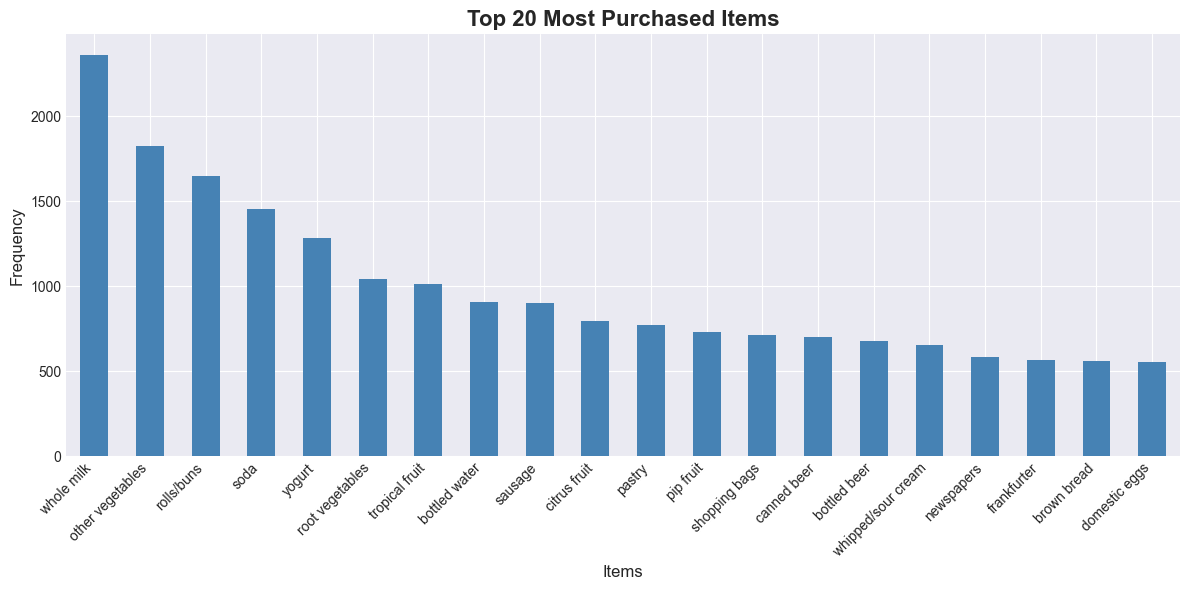

✓ Saved: transaction_sizes.png


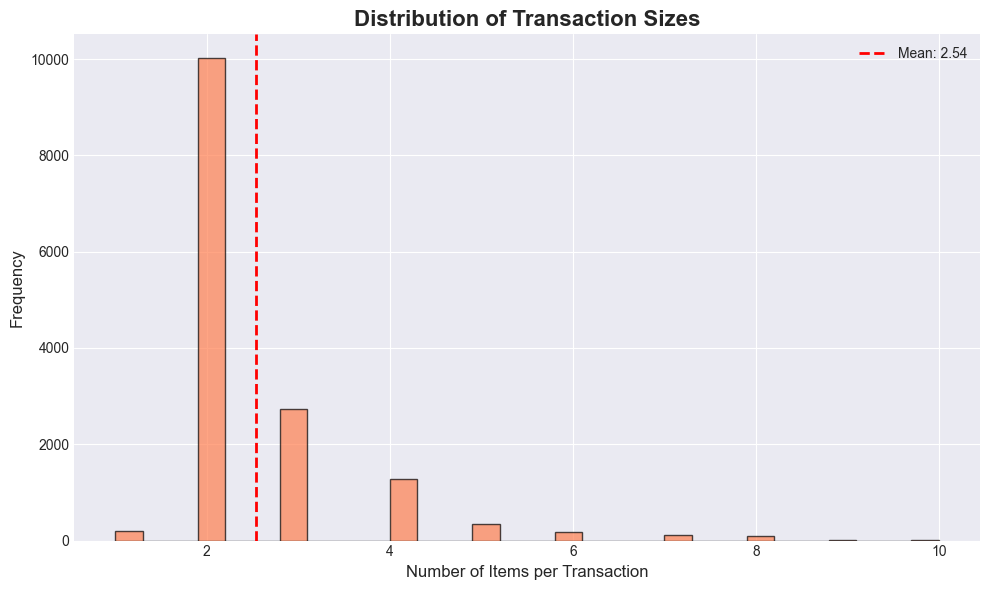

In [9]:
print("\n[4/6] Creating Visualizations...")

# Count item frequencies
item_freq = df_encoded.sum().sort_values(ascending=False)

# Top 20 most purchased items
plt.figure(figsize=(12, 6))
item_freq.head(20).plot(kind='bar', color='steelblue')
plt.title('Top 20 Most Purchased Items', fontsize=16, fontweight='bold')
plt.xlabel('Items', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('top_20_items.png', dpi=300, bbox_inches='tight')
print("✓ Saved: top_20_items.png")
plt.show()

# Transaction size distribution
transaction_sizes = df_encoded.sum(axis=1)
plt.figure(figsize=(10, 6))
plt.hist(transaction_sizes, bins=30, color='coral', edgecolor='black', alpha=0.7)
plt.title('Distribution of Transaction Sizes', fontsize=16, fontweight='bold')
plt.xlabel('Number of Items per Transaction', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.axvline(transaction_sizes.mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {transaction_sizes.mean():.2f}')
plt.legend()
plt.tight_layout()
plt.savefig('transaction_sizes.png', dpi=300, bbox_inches='tight')
print("✓ Saved: transaction_sizes.png")
plt.show()


STEP 5: APRIORI ALGORITHM - FREQUENT ITEMSETS


[5/6] Mining Frequent Itemsets...
✓ Found 69 frequent itemsets

Top 10 Frequent Itemsets:
     support            itemsets
62  0.157923        (whole milk)
40  0.122101  (other vegetables)
46  0.110005        (rolls/buns)
52  0.097106              (soda)
63  0.085879            (yogurt)
47  0.069572   (root vegetables)
57  0.067767    (tropical fruit)
5   0.060683     (bottled water)
49  0.060349           (sausage)
15  0.053131      (citrus fruit)
✓ Saved: support_distribution.png


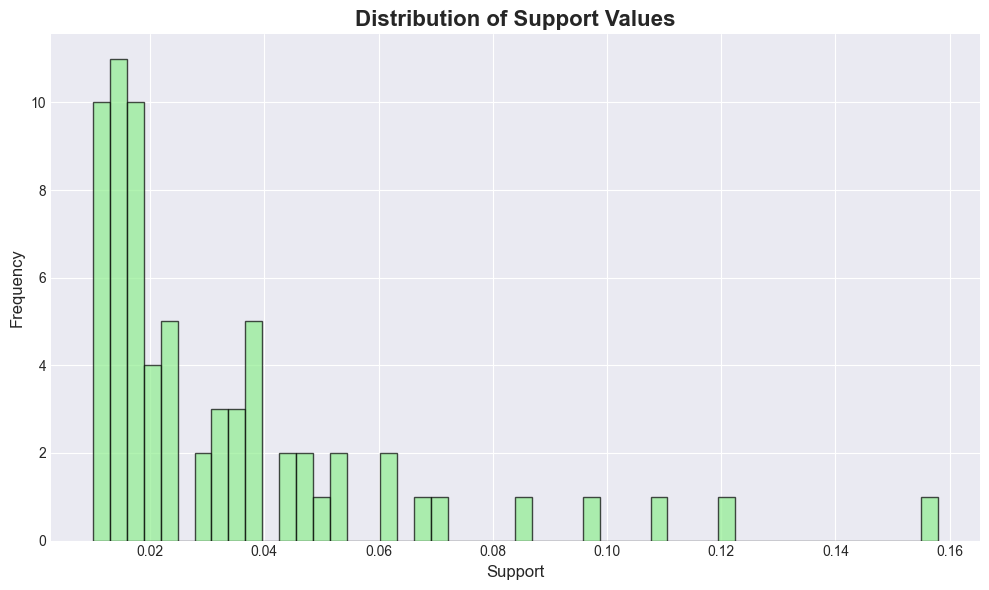

In [10]:
print("\n[5/6] Mining Frequent Itemsets...")

# Apply Apriori algorithm
min_support = 0.01  # Minimum support threshold (1%)
frequent_itemsets = apriori(df_encoded, min_support=min_support, use_colnames=True)

print(f"✓ Found {len(frequent_itemsets)} frequent itemsets")
print("\nTop 10 Frequent Itemsets:")
print(frequent_itemsets.sort_values('support', ascending=False).head(10))

# Visualize support distribution
plt.figure(figsize=(10, 6))
plt.hist(frequent_itemsets['support'], bins=50, color='lightgreen', edgecolor='black', alpha=0.7)
plt.title('Distribution of Support Values', fontsize=16, fontweight='bold')
plt.xlabel('Support', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.tight_layout()
plt.savefig('support_distribution.png', dpi=300, bbox_inches='tight')
print("✓ Saved: support_distribution.png")
plt.show()


STEP 6: ASSOCIATION RULES


[6/6] Generating Association Rules...
✓ Generated 0 association rules

Top 10 Association Rules by Lift:
Empty DataFrame
Columns: [antecedents, consequents, support, confidence, lift]
Index: []
✓ Saved: association_rules.csv

✓ Strong Rules (lift > 2, confidence > 0.5): 0

Top 10 Strong Rules:
Empty DataFrame
Columns: [antecedents, consequents, support, confidence, lift]
Index: []
✓ Saved: association_rules_visualization.png


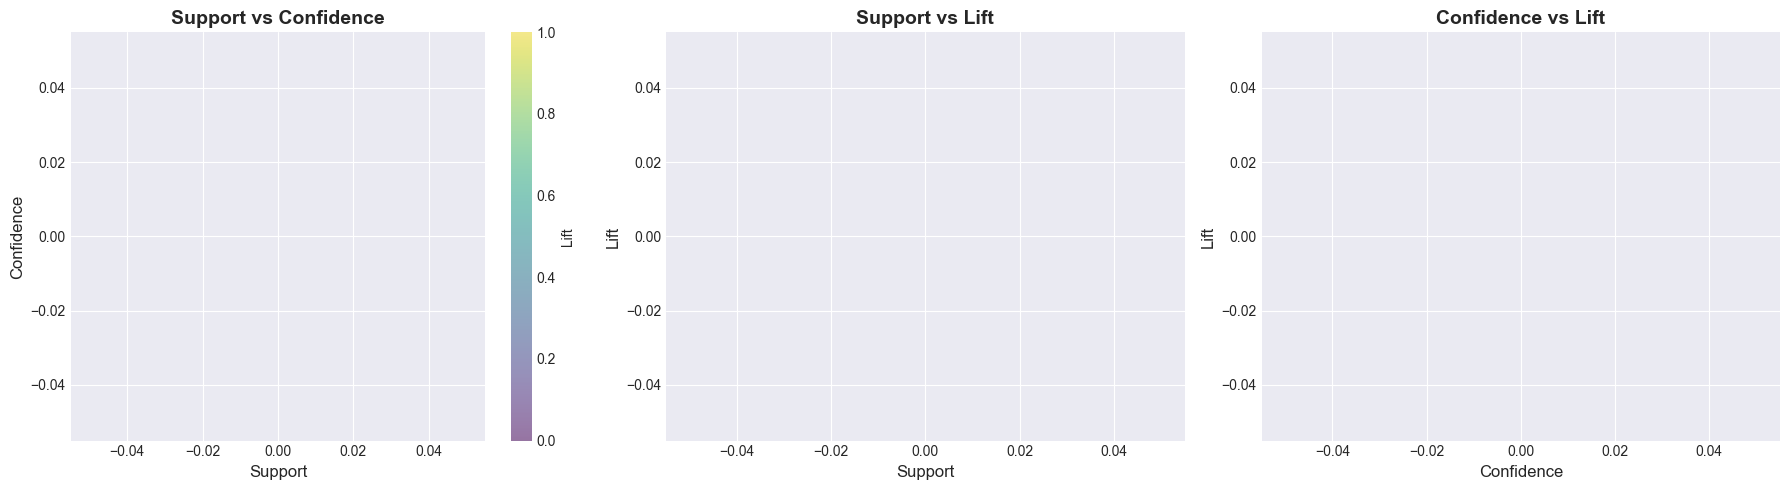

In [11]:
print("\n[6/6] Generating Association Rules...")

# Generate association rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)
rules = rules.sort_values('lift', ascending=False)

print(f"✓ Generated {len(rules)} association rules")
print("\nTop 10 Association Rules by Lift:")
print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head(10))

# Save rules to CSV
rules.to_csv('association_rules.csv', index=False)
print("✓ Saved: association_rules.csv")

# Filter strong rules
strong_rules = rules[(rules['lift'] > 2) & (rules['confidence'] > 0.5)]
print(f"\n✓ Strong Rules (lift > 2, confidence > 0.5): {len(strong_rules)}")
print("\nTop 10 Strong Rules:")
print(strong_rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head(10))

# Visualize rules
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Support vs Confidence
axes[0].scatter(rules['support'], rules['confidence'], alpha=0.5, c=rules['lift'], cmap='viridis', s=50)
axes[0].set_xlabel('Support', fontsize=12)
axes[0].set_ylabel('Confidence', fontsize=12)
axes[0].set_title('Support vs Confidence', fontsize=14, fontweight='bold')
cbar1 = plt.colorbar(axes[0].collections[0], ax=axes[0])
cbar1.set_label('Lift', fontsize=10)

# Support vs Lift
axes[1].scatter(rules['support'], rules['lift'], alpha=0.5, color='coral', s=50)
axes[1].set_xlabel('Support', fontsize=12)
axes[1].set_ylabel('Lift', fontsize=12)
axes[1].set_title('Support vs Lift', fontsize=14, fontweight='bold')

# Confidence vs Lift
axes[2].scatter(rules['confidence'], rules['lift'], alpha=0.5, color='lightgreen', s=50)
axes[2].set_xlabel('Confidence', fontsize=12)
axes[2].set_ylabel('Lift', fontsize=12)
axes[2].set_title('Confidence vs Lift', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.savefig('association_rules_visualization.png', dpi=300, bbox_inches='tight')
print("✓ Saved: association_rules_visualization.png")
plt.show()

SUMMARY AND INSIGHTS

In [12]:
print("\n" + "="*60)
print("PROJECT SUMMARY")
print("="*60)
print(f"\n📊 Dataset Statistics:")
print(f"  • Total Transactions: {len(transactions)}")
print(f"  • Unique Items: {df_encoded.shape[1]}")
print(f"  • Avg Items per Transaction: {transaction_sizes.mean():.2f}")
print(f"  • Most Popular Item: {item_freq.index[0]} ({item_freq.values[0]} purchases)")

print(f"\n🔍 Analysis Results:")
print(f"  • Frequent Itemsets Found: {len(frequent_itemsets)}")
print(f"  • Association Rules Generated: {len(rules)}")
print(f"  • Strong Rules (lift>2, conf>0.5): {len(strong_rules)}")

print("\n💡 Key Insights:")
if len(strong_rules) > 0:
    top_rule = strong_rules.iloc[0]
    print(f"  • Strongest Association: {top_rule['antecedents']} → {top_rule['consequents']}")
    print(f"    - Lift: {top_rule['lift']:.2f}")
    print(f"    - Confidence: {top_rule['confidence']:.2%}")
    print(f"    - Support: {top_rule['support']:.2%}")

print("\n✅ Project Completed Successfully!")
print("="*60)


PROJECT SUMMARY

📊 Dataset Statistics:
  • Total Transactions: 14963
  • Unique Items: 167
  • Avg Items per Transaction: 2.54
  • Most Popular Item: whole milk (2363 purchases)

🔍 Analysis Results:
  • Frequent Itemsets Found: 69
  • Association Rules Generated: 0
  • Strong Rules (lift>2, conf>0.5): 0

💡 Key Insights:

✅ Project Completed Successfully!
